# Classification. Linear models and KNN

Ссылка на Кагл: https://www.kaggle.com/kira2110

In [410]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [411]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import plot_confusion_matrix, accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Part 1: Titanic survival prediction

Dataset

Read the description here: https://www.kaggle.com/c/titanic/data. Download the dataset and place it in the data/titanic/ folder in your working directory. You will use train.csv for model training and validation. The test set is used for model testing: once the model is trained, you can predict whether a passenger survived or not for each passenger in the test set, and submit the predictions: https://www.kaggle.com/c/titanic/overview/evaluation.

In [412]:
PATH = "./data/"

In [413]:
data = pd.read_csv(os.path.join(PATH, 'titanic', 'train.csv')).set_index('PassengerId')

In [414]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [415]:
data_prim = data
data_prim

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


# EDA

(0.5 points) How many females and males are there in the dataset? What about the survived passengers? Is there any relationship between the gender and the survival?

In [416]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [426]:
male = data['Sex'].tolist().count('male')
female = data['Sex'].tolist().count('female')
print(f"male: {male}")
print(f"female: {female}")

survived = data['Survived'].tolist().count(1)
print(f"survived: {survived}")

male: 0
female: 0
survived: 342


In [418]:
# Корреляция
correlations_data = data.corr()['Survived'].sort_values()
correlations_data
#как видно здесь нет нужной нам корреляции, ибо пол - категориальный признак (делала в части model, гдн избавлялась от категориальности и считала корреляцию)

Pclass     -0.338481
Age        -0.077221
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Survived    1.000000
Name: Survived, dtype: float64

Корреляция Пирсона показывает, что возраст совсем немного коррелирует с выживанием, но поскольку -0.077221 ближе к 0, то можно сказать, что связь мала.
Для пола корреляция -0.543351, что довольно много, можно сделать вывод, что зависимость между полом и выживаемостью есть.

(0.5 points) Plot age distribution of the passengers. What is the average and the median age of survived and deceased passengers? Do age distributions differ for survived and deceased passengers? Why?

C:\Users\Irisha-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


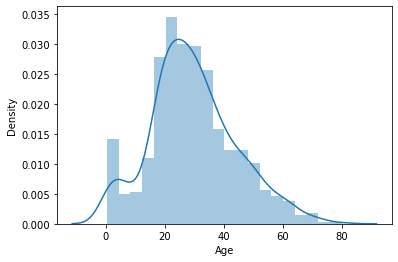

In [419]:
sns_plot = sns.distplot(data['Age'])
fig = sns_plot.get_figure()

In [420]:
sur = data[(data['Survived'] == 1)]['Age'].mean()
dead = data[(data['Survived'] == 0)]['Age'].mean()
sur_m = data[(data['Survived'] == 1)]['Age'].median()
dead_m = data[(data['Survived'] == 0)]['Age'].median()
print(sur, sur_m)
print(dead, dead_m)

28.343689655172415 28.0
30.62617924528302 28.0


< your thoughts > 

(1 point) Explore "passenger class" and "embarked" features. What class was "the safest"? Is there any relationship between the embarkation port and the survival? Provide the corresponding visualizations.

136 87 119


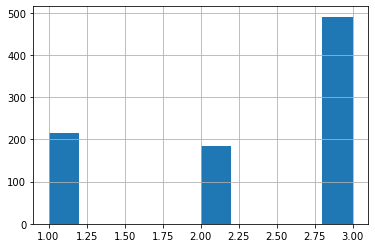

In [422]:
## passenger class: 1 = 1-й, 2 = 2-й, 3 = 3-й
clas1 = len(data[(data['Pclass'] == 1) & (data['Survived'] == 1)])
clas2 = len(data[(data['Pclass'] == 2) & (data['Survived'] == 1)])
clas3 = len(data[(data['Pclass'] == 3) & (data['Survived'] == 1)])
print(clas1, clas2, clas3)
h = data['Pclass'].hist()
fig = h.get_figure()
#Как видно из полученных данных, больше всего выживших из 1-го класса - 136 человек

93 30 217


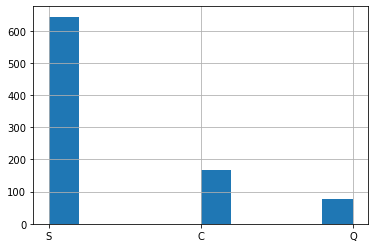

In [423]:
## embarked: C = Cherbourg, Q = Queenstown, S = Southampton
#data['Embarked'] = data['Embarked'].map(data.groupby('Embarked').size())
#data['Embarked']
embC = len(data[(data['Embarked'] == 'C') & (data['Survived'] == 1)])
embQ = len(data[(data['Embarked'] == 'Q') & (data['Survived'] == 1)])
embS = len(data[(data['Embarked'] == 'S') & (data['Survived'] == 1)])
print(embC, embQ, embS)
h = data['Embarked'].hist()
fig = h.get_figure()

#В данном случае, больше всего выживших село на Титаник в порту Southampton

In [387]:
#Выжившие 1-го класса по портам C = Cherbourg, Q = Queenstown, S = Southampton
kol1 = len(data[(data['Pclass'] == 1) & (data['Survived'] == 1) & (data['Embarked'] == 'C')])
kol2 = len(data[(data['Pclass'] == 1) & (data['Survived'] == 1) & (data['Embarked'] == 'Q')])
kol3 = len(data[(data['Pclass'] == 1) & (data['Survived'] == 1) & (data['Embarked'] == 'S')])
print(kol1, kol2, kol3)

#Выжившие 2-го класса по портам C = Cherbourg, Q = Queenstown, S = Southampton
kol12 = len(data[(data['Pclass'] == 2) & (data['Survived'] == 1) & (data['Embarked'] == 'C')])
kol22 = len(data[(data['Pclass'] == 2) & (data['Survived'] == 1) & (data['Embarked'] == 'Q')])
kol32 = len(data[(data['Pclass'] == 2) & (data['Survived'] == 1) & (data['Embarked'] == 'S')])
print(kol12, kol22, kol32)

#Выжившие 3-го класса по портам C = Cherbourg, Q = Queenstown, S = Southampton
kol13 = len(data[(data['Pclass'] == 3) & (data['Survived'] == 1) & (data['Embarked'] == 'C')])
kol23 = len(data[(data['Pclass'] == 3) & (data['Survived'] == 1) & (data['Embarked'] == 'Q')])
kol33 = len(data[(data['Pclass'] == 3) & (data['Survived'] == 1) & (data['Embarked'] == 'S')])
print(kol13, kol23, kol33)

59 1 74
9 2 76
25 27 67


# Modelling


(0.5 points) Find the percentage of missing values for each feature.

In [388]:
data.isnull().mean()

Survived    0.000000
Pclass      0.000000
Name        0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Ticket      0.000000
Fare        0.000000
Cabin       0.771044
Embarked    0.002245
dtype: float64

Think about the ways to handle these missing values for modelling and write your answer below. Which methods would you suggest? What are their advantages and disadvantages?

< your thoughts > Для числовых типов, вероятно, стоит заполнять пропуски средним, потому что затем будет считаться корреляция бинарной и вещественной переменной, а это делается через разность мат. ожиданий (E[X1|X2=1] - E[X1|X2=0]), то есть важно сохранить мат. ожидание неизменным.

Для категориальных признаков корреляцию с бинарным признаком можно подсчитать с помощью коэффициента V Крамера:

chi2 = stats.chi2_contingency(confusion_matrix)[0]
n = confusion_matrix.sum()
return np.sqrt(chi2 / (n*(min(confusion_matrix.shape)-1)))
То есть на вход подается таблица сопряженности. Если данных достаточно, то я бы исключил все пропуски. Второй подход ввести новую категорию у каждого признака, например, "no_value", но в этом случае она также будет фигурировать в таблице сопряженности.

(1.5 points) Prepare the features and train two models (KNN and Logistic Regression) to predict the survival. Compare the results. Use accuracy as a metric. Don't forget about cross-validation!

In [424]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import VarianceThreshold, SelectFromModel, RFECV, SequentialFeatureSelector

y = data['Survived']

#Categorical Features
data['Pclass'] = data['Pclass'].map(data.groupby('Pclass').size())
data['Sex'] = data['Sex'].map(data.groupby('Sex').size())
data['Embarked'] = data['Embarked'].map(data.groupby('Embarked').size())

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']
for feat in features:
    data.fillna({feat: data[feat].mean()}, inplace=True)

data[features]

#Корреляция для задания выше
correlations_data = data.corr()['Survived'].sort_values()
correlations_data

Sex        -0.543351
Pclass     -0.313463
Embarked   -0.142741
Age        -0.069809
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Survived    1.000000
Name: Survived, dtype: float64

In [349]:
'''
data_1 = data_prim.drop('Name', 1) 
data_new = data_1.drop('Ticket', 1)
print(data_new)


#Находим важные функции
selection_model = RandomForestClassifier(random_state=42)
selector = SelectFromModel(selection_model).fit(data_new, y)
data_pruned = selector.transform(data_new)
print(data_new.columns[selector.get_support()])
print(f'Original shape: {data_new.shape}')
print(f'Shape after selection: {data_pruned.shape}')
'''

"\ndata_1 = data_prim.drop('Name', 1) \ndata_new = data_1.drop('Ticket', 1)\nprint(data_new)\n\n\n#Находим важные функции\nselection_model = RandomForestClassifier(random_state=42)\nselector = SelectFromModel(selection_model).fit(data_new, y)\ndata_pruned = selector.transform(data_new)\nprint(data_new.columns[selector.get_support()])\nprint(f'Original shape: {data_new.shape}')\nprint(f'Shape after selection: {data_pruned.shape}')\n"

In [350]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    int64  
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    float64
 10  Embarked  891 non-null    float64
dtypes: float64(4), int64(5), object(2)
memory usage: 83.5+ KB


In [370]:
'''
#Без скалирования
X = data[features]
y = data['Survived']

#Логистическая регрессия
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X, y)
data['Survived_pred'] = logreg.predict(X)
print(accuracy_score(data['Survived'], data['Survived_pred']))

#KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
type(knn)
knn.fit(X, y)
data['Survived_pred_knn'] = knn.predict(X)
print(accuracy_score(data['Survived'], data['Survived_pred_knn']))

#Кросс-валидация
print(f"Кросс-валидация для логистической регрессии: {cross_validate(logreg, X, y, scoring='accuracy', cv=5)}\n")
print(f"Кросс-валидация для KNN: {cross_validate(knn, X, y, scoring='accuracy', cv=5)}")

'''

0.7586980920314254
0.920314253647587
Кросс-валидация для логистической регрессии: {'fit_time': array([0.01700449, 0.01700377, 0.01700354, 0.01600361, 0.01600313]), 'score_time': array([0.00099993, 0.0010004 , 0.0010004 , 0.00100017, 0.00100064]), 'test_score': array([0.79329609, 0.79775281, 0.79775281, 0.78089888, 0.83707865])}

Кросс-валидация для KNN: {'fit_time': array([0.00300097, 0.00300097, 0.00200057, 0.00200057, 0.00200033]), 'score_time': array([0.00500083, 0.00500059, 0.00600123, 0.00600147, 0.00500131]), 'test_score': array([0.76536313, 0.78651685, 0.79213483, 0.7752809 , 0.76404494])}


C:\Users\Irisha-PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Irisha-PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

In [402]:

#Скалирование данных
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])
data_scaled

X = data_scaled
y = data['Survived']

#Логистическая регрессия
logreg = LogisticRegression()
logreg.fit(X, y)
data['Survived_pred_scaled'] = logreg.predict(X)
print(accuracy_score(data['Survived'], data['Survived_pred_scaled']))

#KNN
knn = KNeighborsClassifier(n_neighbors=1)
type(knn)
knn.fit(X, y)
data['Survived_pred_knn_scaled'] = knn.predict(X)
print(accuracy_score(data['Survived'], data['Survived_pred_knn_scaled']))

#Кросс-валидация
print(f"Кросс-валидация для логистической регрессии: {cross_validate(logreg, X, y, scoring='accuracy', cv=5)}\n")
print(f"Кросс-валидация для KNN: {cross_validate(knn, X, y, scoring='accuracy', cv=5)}")


0.8069584736251403
0.9001122334455668
Кросс-валидация для логистической регрессии: {'fit_time': array([0.00200891, 0.00199986, 0.00200081, 0.00200033, 0.00199962]), 'score_time': array([0.       , 0.0010016, 0.       , 0.       , 0.       ]), 'test_score': array([0.81564246, 0.79213483, 0.79213483, 0.76404494, 0.8258427 ])}

Кросс-валидация для KNN: {'fit_time': array([0.00100112, 0.00200033, 0.00099993, 0.0010004 , 0.00099969]), 'score_time': array([0.0040009 , 0.00400138, 0.00500131, 0.00400138, 0.00402927]), 'test_score': array([0.69832402, 0.73033708, 0.79213483, 0.74719101, 0.75280899])}


(0.5 + X points) Try more feature engineering and hyperparameter tuning to improve the results. You may use either KNN or Logistic Regression (or both).

In [390]:
#Скалирование данных MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_min_max = scaler.fit_transform(data[features])

X = data_min_max
y = data['Survived']

#Логистическая регрессия
logreg = LogisticRegression()
logreg.fit(X, y)
data['Survived_pred_scaled_min_max'] = logreg.predict(X)
print(accuracy_score(data['Survived'], data['Survived_pred_scaled_min_max']))

#KNN
knn = KNeighborsClassifier(n_neighbors=1)
type(knn)
knn.fit(X, y)
data['Survived_pred_knn_scaled_min_max'] = knn.predict(X)
print(accuracy_score(data['Survived'], data['Survived_pred_knn_scaled_min_max']))

#Кросс-валидация
print(f"Кросс-валидация для логистической регрессии: {cross_validate(logreg, X, y, scoring='accuracy', cv=5)}\n")
print(f"Кросс-валидация для KNN: {cross_validate(knn, X, y, scoring='accuracy', cv=5)}")


0.8024691358024691
0.9225589225589226
Кросс-валидация для логистической регрессии: {'fit_time': array([0.00400138, 0.0040009 , 0.0040009 , 0.00400043, 0.0040009 ]), 'score_time': array([0.00100017, 0.        , 0.        , 0.0010004 , 0.        ]), 'test_score': array([0.80446927, 0.80898876, 0.79213483, 0.74719101, 0.82022472])}

Кросс-валидация для KNN: {'fit_time': array([0.00100064, 0.00100017, 0.00100017, 0.00200057, 0.0010004 ]), 'score_time': array([0.00500107, 0.00500107, 0.0040009 , 0.00400066, 0.0040009 ]), 'test_score': array([0.69273743, 0.75280899, 0.80898876, 0.76966292, 0.76966292])}


In [364]:
'''#Добавляем фичи
features_new = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked', 'Cabin']

data['Pclass'] = data['Pclass'].map(data.groupby('Pclass').size())
data['Sex'] = data['Sex'].map(data.groupby('Sex').size())
data['Embarked'] = data['Embarked'].map(data.groupby('Embarked').size())
data['Cabin'] = data['Cabin'].map(data.groupby('Cabin').size())
data['Cabin']

for feat in features_new:
    data.fillna({feat: data[feat].mean()}, inplace=True)

data[features_new]

#Скалирование данных MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_min_max_n = scaler.fit_transform(data[features_new])

X = data_min_max_n
y = data['Survived']

#Логистическая регрессия
logreg = LogisticRegression()
logreg.fit(X, y)
data['Survived_new_features'] = logreg.predict(X)
print(accuracy_score(data['Survived'], data['Survived_new_features']))

#KNN
knn = KNeighborsClassifier(n_neighbors=1)
type(knn)
knn.fit(X, y)
data['Survived_knn_new_features'] = knn.predict(X)
print(accuracy_score(data['Survived'], data['Survived_knn_new_features']))

#Кросс-валидация
print(f"Кросс-валидация для логистической регрессии: {cross_validate(logreg, X, y, scoring='accuracy', cv=5)}\n")
print(f"Кросс-валидация для KNN: {cross_validate(knn, X, y, scoring='accuracy', cv=5)}")
'''

0.8148148148148148
0.9315375982042648
Кросс-валидация для логистической регрессии: {'fit_time': array([0.00500178, 0.00500083, 0.00400114, 0.0040009 , 0.00400066]), 'score_time': array([0.        , 0.        , 0.        , 0.00100017, 0.        ]), 'test_score': array([0.81005587, 0.79775281, 0.79775281, 0.78089888, 0.84269663])}

Кросс-валидация для KNN: {'fit_time': array([0.00198913, 0.00200105, 0.00100064, 0.00100064, 0.00100088]), 'score_time': array([0.00400043, 0.00400043, 0.00500083, 0.00500059, 0.00500059]), 'test_score': array([0.67039106, 0.73595506, 0.80898876, 0.74157303, 0.75280899])}


Load the test set and make the predictions. Submit them to kaggle and see the results :) Select the best model, load the test set and make the predictions. Submit them to kaggle.

Note. X points will depend on your kaggle leaderboard score.$$ f(score) = 0.5, \ \ 0.76 \leq score &lt; 0.78,$$$$ f(score) = 1.0, \ \ 0.78 \leq score &lt; 0.81,$$$$ f(score) = 2.5, \ \ 0.81 \leq score $$Your code should generate the output submitted to kaggle. Fix random seeds to make the results reproducible.

In [391]:
tested = pd.read_csv(os.path.join(PATH, 'titanic', 'test.csv')).set_index('PassengerId')

In [392]:
tested.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [393]:
tested.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [394]:
tested['Pclass'] = tested['Pclass'].map(tested.groupby('Pclass').size())
tested['Sex'] = tested['Sex'].map(tested.groupby('Sex').size())
tested['Embarked'] = tested['Embarked'].map(tested.groupby('Embarked').size())
tested['Embarked']

features_t = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']
for feat_t in features_t:
    tested.fillna({feat_t: tested[feat_t].mean()}, inplace=True)

tested[features_t]


,Pclass,Sex,Age,SibSp,Parch,Embarked
PassengerId,,,,,,
892,218,266,34.50000,0,0,46
893,218,152,47.00000,1,0,270
894,93,266,62.00000,0,0,46
895,218,266,27.00000,0,0,270
896,218,152,22.00000,1,1,270
...,...,...,...,...,...,...
1305,218,266,30.27259,0,0,270
1306,107,152,39.00000,0,0,102
1307,218,266,38.50000,0,0,270


In [395]:
tested[features_t].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Embarked  418 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 22.9 KB


In [396]:
#Скалируем тестовый набор
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
test_min_max = scaler.fit_transform(tested[features_t])
test_min_max

#KNN для тестовых данных (использовала первым, так как на трейне показал лучший результат 90%), но на Kaggle результат 68%
X = test_min_max
tested['test_pred'] = knn.predict(X)
test_y = tested['test_pred']


In [397]:
#Запись в файл
sub = pd.read_csv(os.path.join(PATH, 'titanic', 'gender_submission.csv'))
sub['Survived'] = knn.predict(X)
sub.head()
sub.to_csv('knn.csv',index=False)

In [398]:
#Логистическая регрессия дала более приятный результат 77% на Kaggle
X = test_min_max
tested['pred_log'] = logreg.predict(X)

In [399]:
#Запись в файл
sub = pd.read_csv(os.path.join(PATH, 'titanic', 'gender_submission.csv'))
sub['Survived'] = logreg.predict(X)
sub.head()
sub.to_csv('logreg.csv',index=False)

In [206]:
'''
#Изменим набор признаков
features_new = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Cabin']

tested['Pclass'] = tested['Pclass'].map(tested.groupby('Pclass').size())
tested['Sex'] = tested['Sex'].map(tested.groupby('Sex').size())
tested['Embarked'] = tested['Embarked'].map(tested.groupby('Embarked').size())
tested['Cabin'] = tested['Cabin'].map(tested.groupby('Cabin').size())
tested['Embarked']

for feat_n in features_new:
    tested.fillna({feat_n: tested[feat_n].mean()}, inplace=True)

tested[features_new]

#Скалирование данных MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
tested_min_max_n = scaler.fit_transform(tested[features_new])

#KNN для тестовых данных 64%
X = tested_min_max_n
tested['test_pred_n'] = knn.predict(X)
tested_y = tested['test_pred_n']

#Запись в файл
sub = pd.read_csv(os.path.join(PATH, 'titanic', 'gender_submission.csv'))
sub['Survived'] = knn.predict(X)
sub.head()
sub.to_csv('knn_new_features.csv',index=False)

#Логистическая регрессия для новых признаков 75%
X = tested_min_max_n
tested['pred_log_n'] = logreg.predict(X)

#Запись в файл
sub = pd.read_csv(os.path.join(PATH, 'titanic', 'gender_submission.csv'))
sub['Survived'] = logreg.predict(X)
sub.head()
sub.to_csv('logreg_new_features.csv',index=False)
'''

In [369]:
'''
#Изменим набор признаков
features_n = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked', 'Cabin']

tested['Pclass'] = tested['Pclass'].map(tested.groupby('Pclass').size())
tested['Sex'] = tested['Sex'].map(tested.groupby('Sex').size())
tested['Embarked'] = tested['Embarked'].map(tested.groupby('Embarked').size())
tested['Cabin'] = tested['Cabin'].map(tested.groupby('Cabin').size())
tested['Embarked']

for feat_n in features_n:
    tested.fillna({feat_n: tested[feat_n].mean()}, inplace=True)

    
#Скалирование данных MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
tested_n = scaler.fit_transform(tested[features_n])

#Логистическая регрессия для новых признаков 77%
X = tested_n
tested['log_pred'] = logreg.predict(X)

#Запись в файл
sub = pd.read_csv(os.path.join(PATH, 'titanic', 'gender_submission.csv'))
sub['Survived'] = logreg.predict(X)
sub.head()
sub.to_csv('logreg_all_features.csv',index=False)
'''

In [405]:
#StandartScaler

tested['Pclass'] = tested['Pclass'].map(tested.groupby('Pclass').size())
tested['Sex'] = tested['Sex'].map(tested.groupby('Sex').size())
tested['Embarked'] = tested['Embarked'].map(tested.groupby('Embarked').size())

features1 = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']
for feat1 in features1:
    tested.fillna({feat1: tested[feat1].mean()}, inplace=True)

print(tested[features1])

#Скалирование данных
scaler = StandardScaler()
tested_sc = scaler.fit_transform(tested[features1])

X = tested_sc

#Логистическая регрессия со StandartScaler дала лучший результат на Kaggle - 0,77990
tested['Survived_ss'] = logreg.predict(X)

#Запись в файл
sub = pd.read_csv(os.path.join(PATH, 'titanic', 'gender_submission.csv'))
sub['Survived'] = logreg.predict(X)
sub.head()
sub.to_csv('logreg_ss.csv',index=False)

             Pclass  Sex       Age  SibSp  Parch  Embarked
PassengerId                                               
892             218  266  34.50000      0      0        46
893             218  152  47.00000      1      0       270
894              93  266  62.00000      0      0        46
895             218  266  27.00000      0      0       270
896             218  152  22.00000      1      1       270
...             ...  ...       ...    ...    ...       ...
1305            218  266  30.27259      0      0       270
1306            107  152  39.00000      0      0       102
1307            218  266  38.50000      0      0       270
1308            218  266  30.27259      0      0       270
1309            218  266  30.27259      1      1       102

[418 rows x 6 columns]


# Part 2: Porto Seguro’s Safe Driver Prediction

Let's build a model that predicts the probability that a driver will initiate an auto insurance claim in the next year. Read the detailed description and download the dataset https://www.kaggle.com/c/porto-seguro-safe-driver-prediction/data. Put the data into ./data/porto/.

In [108]:
insurance_data = pd.read_csv(os.path.join(PATH, 'porto', 'train.csv')).set_index('id')

In [109]:
insurance_data.head()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
7,0,2,2,5,1,0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
9,0,1,1,7,0,0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
13,0,5,4,9,1,0,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
16,0,0,1,2,0,0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
17,0,0,2,0,1,0,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0


Let's skip EDA for now. We'll use SGDClassifier and build a simple baseline: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html. Note that loss='log' gives logistic regression.

In [110]:
y = insurance_data['target']
X = insurance_data.drop(columns=['target'])

In [111]:
numeric_features = [column for column in X if not (column.endswith("cat") or column.endswith("bin"))]
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_features = [column for column in X if (column.endswith("cat") or column.endswith("bin"))]
categorical_transformer = Pipeline(steps=[('encoder', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', SGDClassifier(loss='log', alpha=0.001, n_jobs=-1, random_state=14))])

In [112]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

In [113]:
clf = pipeline.fit(X_train, y_train)

We'll calculate the model accuracy:

In [114]:
accuracy_score(y_true=y_valid, y_pred=clf.predict(X_valid))

0.9631224658945812

Wow! Our model gets ~0.963 accuracy! But is it really good?...

Let's plot the confusion matrix and analyze the errors.

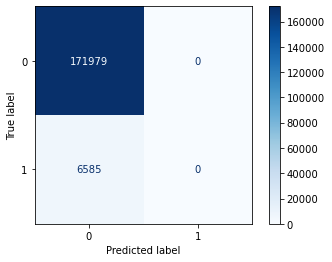

In [115]:
disp = plot_confusion_matrix(clf, X_valid, y_valid,
                             cmap=plt.cm.Blues,
                             normalize=None)

Well, it turns out that our model is completely useless. Let's calculate some basic statistics:

In [116]:
insurance_data.describe()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,0.185304,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,0.388544,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



As you see, there are less than 4% of positive examples, so we have to deal with a highly imbalanced dataset.

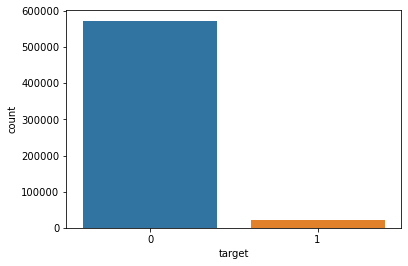

In [118]:
sns.countplot(x='target', data=insurance_data)
plt.show()


Accuracy is not informative here and the Normalized Gini Coefficient will be used instead: https://www.kaggle.com/c/porto-seguro-safe-driver-prediction/overview/evaluation.

In [119]:
# Code for calculating Normalized gini coefficient
# https://www.kaggle.com/c/ClaimPredictionChallenge/discussion/703
def gini(actual, pred, cmpcol = 0, sortcol = 1):  
    assert(len(actual) == len(pred))  
    epsilon = 1e-7
    values = np.asarray(np.c_[actual, pred, np.arange(len(actual))], dtype=np.float)  
    values = values[np.lexsort((values[:, 2], -1 * values[:, 1]))]  
    total = values[:, 0].sum() 
    gini_sum = (values[:, 0].cumsum().sum() + epsilon) / (total + epsilon)  
  
    gini_sum -= (len(actual) + 1) / 2  
    return gini_sum / len(actual)  
  
def gini_normalized(a, p):  
    '''Function to calculate the normalized gini coefficient'''
    return gini(a, p) / gini(a, a)

(1.5 points) Prove that the Normalized Gini Coefficient is equivalent to 2 x AUC - 1 :

< your proof >

(0.5 points) By the way, what other metrics could you suggest for this problem?

< your thoughts >

Let's calculate the Normalized Gini Coefficient:

In [120]:
y_pred = clf.predict_proba(X_valid)[:, 1]

In [121]:
gini_normalized(y_valid, y_pred)

0.2558723581569817

(0.5 points + Y bonus points) Try different approaches: oversampling / undersampling, careful feature analysis and feature engineering, etc., to get a reasonable pipeline and improve the model quality. Use cross-validation for model evaluation.

Select the best model, load the test set and make the predictions. Submit them to kaggle. Y bonus points will be calculated as $\frac{round(200 * \max(score - 0.253, 0))}{2}$, where score is your kaggle leaderboard score.

Note: do not use any classification models which have not been covered in the lessons yet.

In [33]:

## your code